In [1]:
import pandas as pd


In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("../scripts"))))

In [3]:
from scripts.data_cleaning import treat_outliers_with_mean, clean_data_1, clean_data_2
from scripts.data_extraction import read_csv

In [4]:
data = read_csv("../Data/Data/Copy of Week2_challenge_data_source(CSV).csv")

extracting data from csv...


In [5]:
print(data.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [6]:

# Aggregating data
user_metrics = data.groupby("MSISDN/Number").agg({
    "Dur. (ms)": "sum",
    "Social Media DL (Bytes)": "sum",
    "Social Media UL (Bytes)": "sum",
    "Google DL (Bytes)": "sum",
    "Google UL (Bytes)": "sum",
    # Add all other apps here
}).reset_index()

# Calculate Total Data Volume per app
user_metrics["Total Social Media Data"] = user_metrics["Social Media DL (Bytes)"] + user_metrics["Social Media UL (Bytes)"]
user_metrics["Total Google Data"] = user_metrics["Google DL (Bytes)"] + user_metrics["Google UL (Bytes)"]


In [7]:
user_metrics

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Total Social Media Data,Total Google Data
0,3.360100e+10,116720.0,2206504.0,25631.0,3337123.0,1051882.0,2232135.0,4389005.0
1,3.360100e+10,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2660565.0,5334863.0
2,3.360100e+10,134969.0,3148004.0,47619.0,3343483.0,99643.0,3195623.0,3443126.0
3,3.360101e+10,49878.0,251469.0,28825.0,5937765.0,3740728.0,280294.0,9678493.0
4,3.360101e+10,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2912542.0,18499616.0
...,...,...,...,...,...,...,...,...
106851,3.379000e+10,8810.0,234320.0,65863.0,6834178.0,697091.0,300183.0,7531269.0
106852,3.379000e+10,140988.0,442214.0,56355.0,1472406.0,3957299.0,498569.0,5429705.0
106853,3.197021e+12,877385.0,668596.0,46628.0,8572779.0,1865881.0,715224.0,10438660.0
106854,3.370000e+14,253030.0,496337.0,25229.0,8215537.0,1615080.0,521566.0,9830617.0


In [8]:
user_metrics.describe

<bound method NDFrame.describe of         MSISDN/Number  Dur. (ms)  Social Media DL (Bytes)  \
0        3.360100e+10   116720.0                2206504.0   
1        3.360100e+10   181230.0                2598548.0   
2        3.360100e+10   134969.0                3148004.0   
3        3.360101e+10    49878.0                 251469.0   
4        3.360101e+10    37104.0                2861230.0   
...               ...        ...                      ...   
106851   3.379000e+10     8810.0                 234320.0   
106852   3.379000e+10   140988.0                 442214.0   
106853   3.197021e+12   877385.0                 668596.0   
106854   3.370000e+14   253030.0                 496337.0   
106855   8.823971e+14   869844.0                1500145.0   

        Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
0                       25631.0          3337123.0          1051882.0   
1                       62017.0          4197697.0          1137166.0   
2             

In [9]:
#Describe Variables & Data Types
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [10]:
Q1 = data['Dur. (ms)'].quantile(0.25)
Q3 = data['Dur. (ms)'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Dur. (ms)'] < (Q1 - 1.5 * IQR)) | (data['Dur. (ms)'] > (Q3 + 1.5 * IQR))]


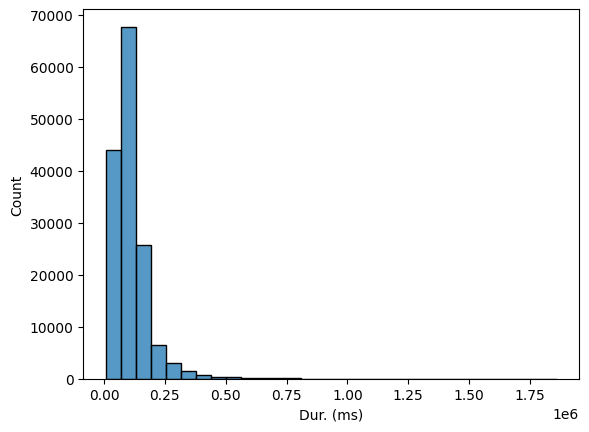

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Dur. (ms)'], bins=30)
plt.show()


In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [13]:
# Dropping rows with missing values in critical columns
data.dropna(subset=['Start', 'End'], inplace=True)

In [14]:
# For 'Last Location Name', 'Handset Manufacturer', and 'Handset Type', decide on imputation
# For example, replace missing manufacturers and types with 'Unknown'
data['Handset Manufacturer'].fillna('Unknown', inplace=True)
data['Handset Type'].fillna('Unknown', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20236\502913399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Handset Manufacturer'].fillna('Unknown', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_20236\502913399.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [15]:
# For Last Location Name, if you want to drop or impute, decide how to handle:
data['Last Location Name'].fillna('Not Available', inplace=True)  # or drop if not crucial

C:\Users\HP\AppData\Local\Temp\ipykernel_20236\543220460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Last Location Name'].fillna('Not Available', inplace=True)  # or drop if not crucial


In [16]:
# Find duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [17]:
# Convert dates to datetime format
data['Start'] = pd.to_datetime(data['Start'], errors='coerce')
data['End'] = pd.to_datetime(data['End'], errors='coerce')

# Convert numeric columns to appropriate types (if needed)
data['Dur. (ms)'] = pd.to_numeric(data['Dur. (ms)'], errors='coerce')

In [18]:
# Detecting outliers using IQR
Q1 = data['Dur. (ms)'].quantile(0.25)
Q3 = data['Dur. (ms)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
data = data[(data['Dur. (ms)'] >= lower_bound) & (data['Dur. (ms)'] <= upper_bound)]

In [19]:
data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]  # Example of lowercasing and replacing spaces

In [20]:
data.to_csv("../Data/Data/telcom.csv")

In [21]:
# Inspect the cleaned data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 142816 entries, 92 to 149999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 141840 non-null  float64       
 1   start                                     142816 non-null  datetime64[ns]
 2   start_ms                                  142816 non-null  float64       
 3   end                                       142816 non-null  datetime64[ns]
 4   end_ms                                    142816 non-null  float64       
 5   dur._(ms)                                 142816 non-null  float64       
 6   imsi                                      142261 non-null  float64       
 7   msisdn/number                             141785 non-null  float64       
 8   imei                                      142259 non-null  float64       
 9   last_location_name 

In [22]:
print(data.describe())

          bearer_id                          start       start_ms  \
count  1.418400e+05                         142816  142816.000000   
mean   1.013511e+19  2019-04-26 15:09:46.109959680     499.180449   
min    6.917538e+18            2019-04-22 05:18:00       0.000000   
25%    7.349883e+18            2019-04-25 02:12:00     249.000000   
50%    7.349883e+18            2019-04-26 09:07:00     499.000000   
75%    1.304243e+19            2019-04-27 20:47:00     749.000000   
max    1.318654e+19            2019-04-29 07:28:00     999.000000   
std    2.893838e+18                            NaN     288.688922   

                                 end         end_ms      dur._(ms)  \
count                         142816  142816.000000  142816.000000   
mean   2019-04-27 16:47:27.779660544     498.843505   92261.136728   
min              2019-04-24 22:59:00       0.000000    7142.000000   
25%              2019-04-26 06:56:00     251.000000   54795.750000   
50%              2019-04-27 

In [23]:
#Identify the top 10 handsets used by customers:
#Use the relevant columns (like imei, msisdn/number, etc.) to determine the most popular handsets.
top_handsets = data['imei'].value_counts().head(10)
print(top_handsets)

imei
8.637690e+13    11
8.643910e+13    10
3.517661e+13     9
8.654080e+13     9
8.619200e+13     8
3.554111e+13     8
3.531181e+13     8
3.561471e+13     8
3.553781e+13     7
3.583521e+13     7
Name: count, dtype: int64


In [24]:
top_handsets = data['msisdn/number'].value_counts().head(10)
print(top_handsets)

msisdn/number
3.366907e+10    11
3.366508e+10    10
3.365043e+10     9
3.360658e+10     9
3.364618e+10     8
3.366971e+10     8
3.366617e+10     8
3.366025e+10     8
3.369876e+10     7
3.366367e+10     7
Name: count, dtype: int64


In [25]:
#Identify the top 3 handset manufacturers:
#Create a new column or directly extract based on imei or msisdn.
# Assuming you have a 'manufacturer' column (you may need to extract it from 'imei')
top_manufacturers = data['handset_manufacturer'].value_counts().head(3)
print(top_manufacturers)

handset_manufacturer
Apple      57493
Samsung    37540
Huawei     33447
Name: count, dtype: int64


In [27]:
#Identify the top 5 handsets per top 3 manufacturers:
#Filter the dataset based on those manufacturers and then count handsets within these groups
top_manufacturers_list = top_manufacturers.index.tolist()
top_handsets_per_manufacturer = data[data['handset_manufacturer'].isin(top_manufacturers_list)]
top_handsets_per_manufacturer = top_handsets_per_manufacturer['msisdn/number'].value_counts().groupby(top_handsets_per_manufacturer['handset_manufacturer']).head(5)
print(top_handsets_per_manufacturer)

Series([], Name: count, dtype: int64)


In [28]:
# First, let's identify the top 3 manufacturers
top_manufacturers = data['handset_manufacturer'].value_counts().head(3)
top_manufacturers_list = top_manufacturers.index.tolist()

# Next, filter the dataset based on these top manufacturers
top_handsets_per_manufacturer = data[data['handset_manufacturer'].isin(top_manufacturers_list)]

# Now, we will group by manufacturers and count the top 5 handsets (imeis)
top_handsets = (
    top_handsets_per_manufacturer['imei']
    .value_counts()
    .reset_index()
)

# Rename the columns for better understanding
top_handsets.columns = ['imei', 'count']

# Now we need to tag each imei with its manufacturer to get the top 5 for each
top_handsets = top_handsets_per_manufacturer.merge(top_handsets, on='imei')

# Group by the manufacturer, get the top 5 handsets for each manufacturer
top_handsets_per_manufacturer_final = (
    top_handsets
    .groupby('handset_manufacturer')
    .apply(lambda x: x.nlargest(5, 'count'))
    .reset_index(drop=True)
)

# Display the result
print(top_handsets_per_manufacturer_final[['handset_manufacturer', 'imei', 'count']])

   handset_manufacturer          imei  count
0                 Apple  3.561471e+13      8
1                 Apple  3.554111e+13      8
2                 Apple  3.554111e+13      8
3                 Apple  3.561471e+13      8
4                 Apple  3.561471e+13      8
5                Huawei  8.637690e+13     11
6                Huawei  8.637690e+13     11
7                Huawei  8.637690e+13     11
8                Huawei  8.637690e+13     11
9                Huawei  8.637690e+13     11
10              Samsung  3.517661e+13      9
11              Samsung  3.517661e+13      9
12              Samsung  3.517661e+13      9
13              Samsung  3.517661e+13      9
14              Samsung  3.517661e+13      9


C:\Users\HP\AppData\Local\Temp\ipykernel_20236\1741777518.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'count'))


C:\Users\HP\AppData\Local\Temp\ipykernel_20236\293072432.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_users, x="count", y="imei", palette="Blues_r")


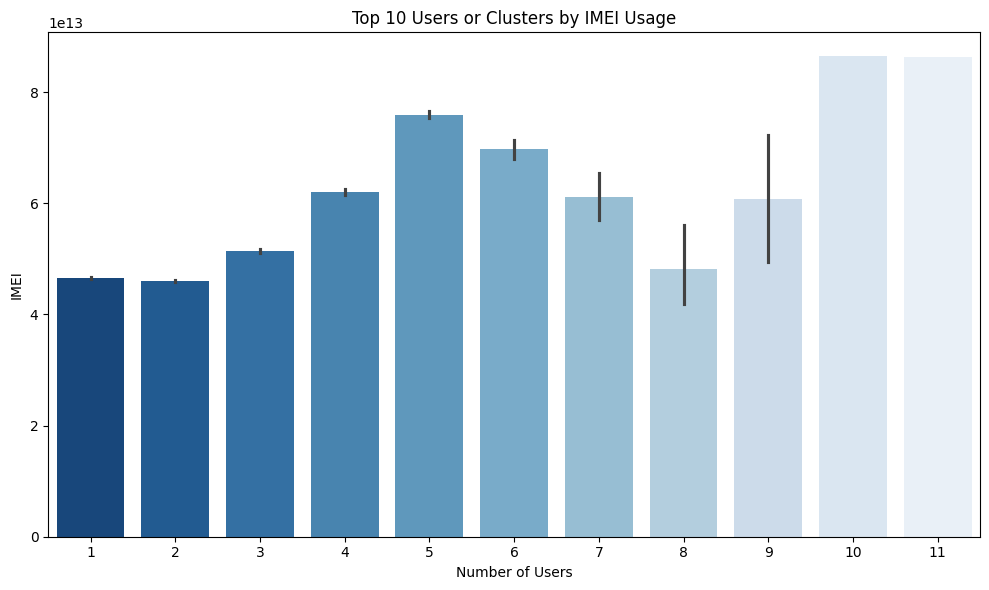

In [29]:
# Create DataFrame
df_top_users = pd.DataFrame(top_handsets)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_users, x="count", y="imei", palette="Blues_r")
plt.title("Top 10 Users or Clusters by IMEI Usage")
plt.xlabel("Number of Users")
plt.ylabel("IMEI")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20236\305410829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_manufacturers, x="handset_manufacturer", y="count", palette="coolwarm")


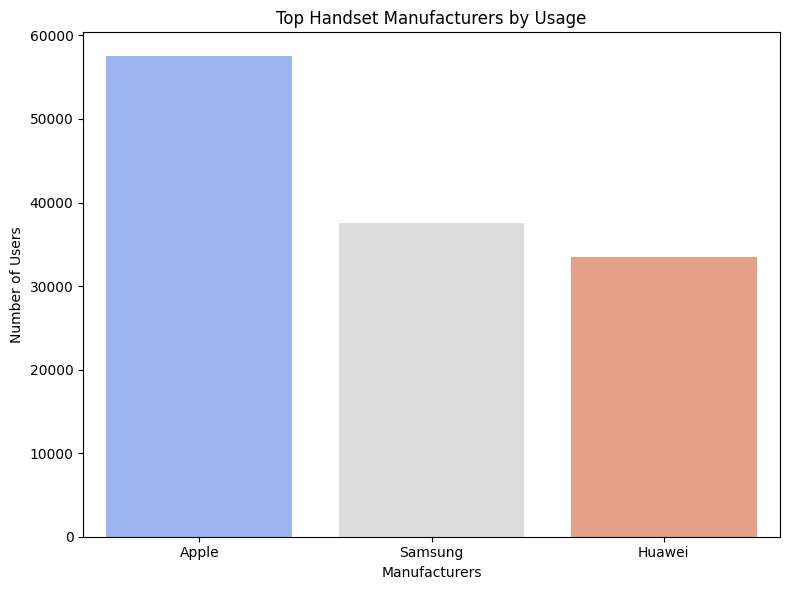

In [30]:
# Top 3 Manufacturers
df_manufacturers = pd.DataFrame(top_manufacturers)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=df_manufacturers, x="handset_manufacturer", y="count", palette="coolwarm")
plt.title("Top Handset Manufacturers by Usage")
plt.xlabel("Manufacturers")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

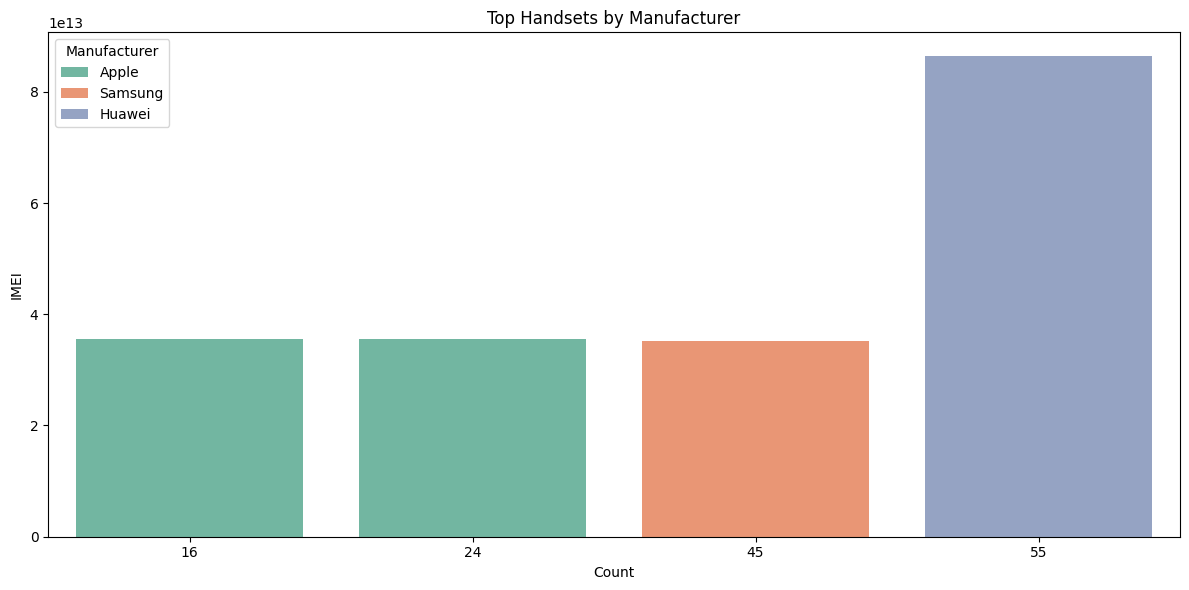

In [31]:


df = pd.DataFrame(top_handsets_per_manufacturer_final)

# Aggregate the data to remove duplicate rows
df_aggregated = df.groupby(["handset_manufacturer", "imei"], as_index=False).agg({"count": "sum"})

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_aggregated,
    x="count",
    y="imei",
    hue="handset_manufacturer",
    palette="Set2"
)
plt.title("Top Handsets by Manufacturer")
plt.xlabel("Count")
plt.ylabel("IMEI")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()

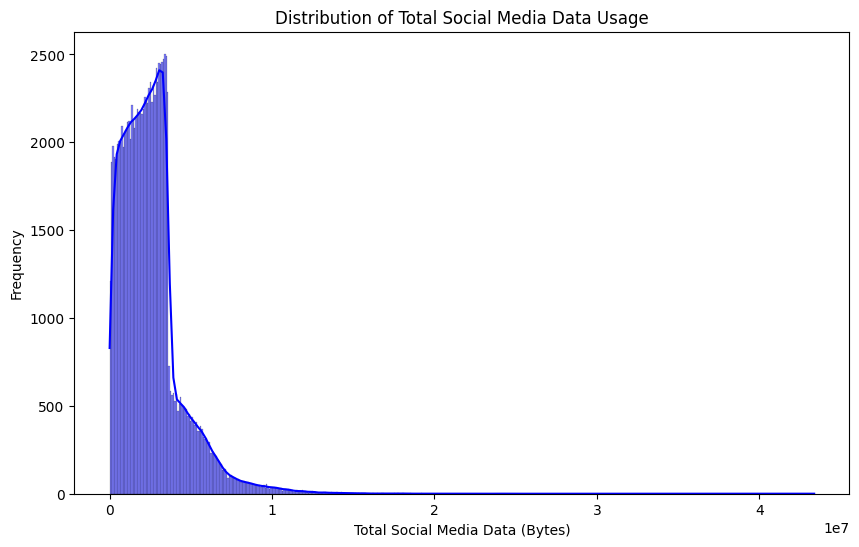

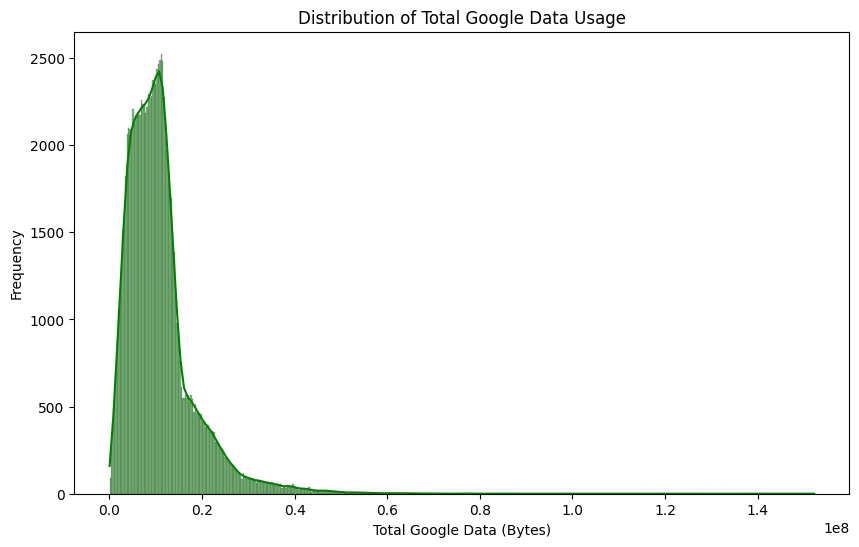

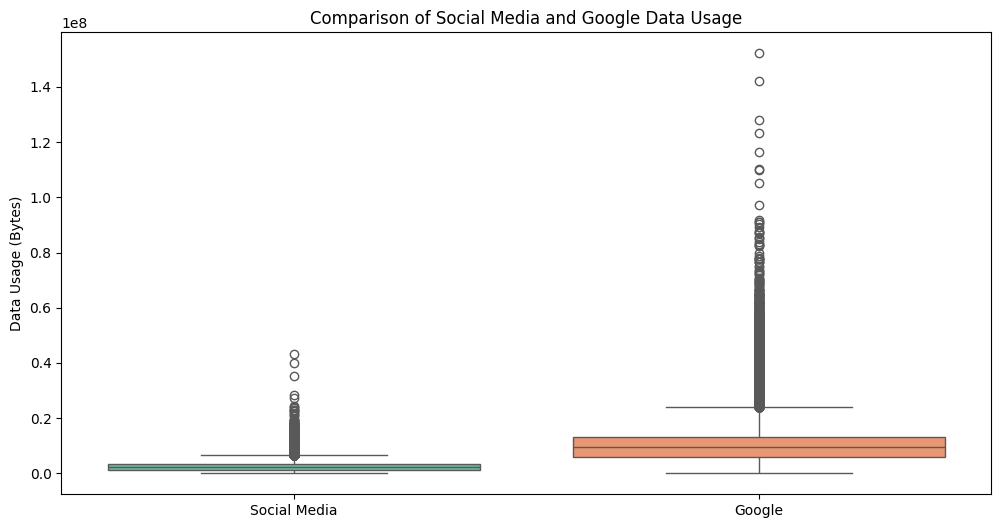

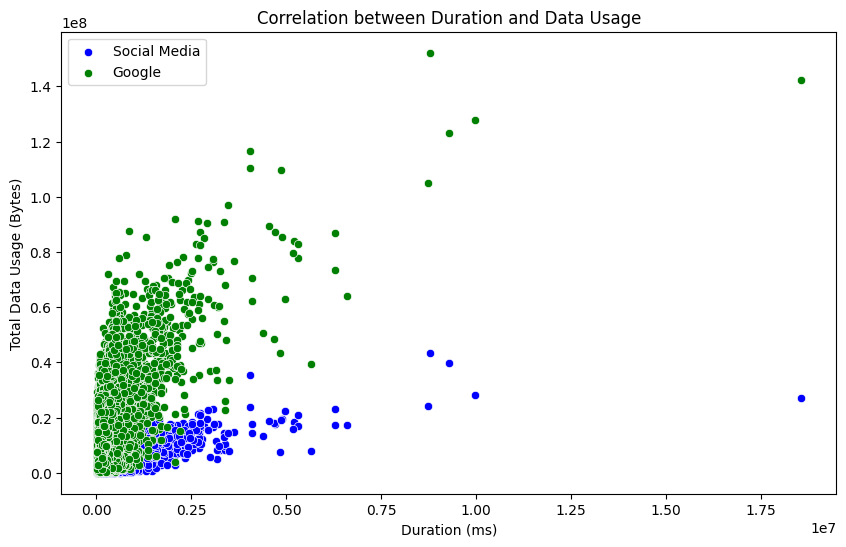

In [32]:
df = pd.DataFrame(user_metrics)

# 1. Distribution of Total Social Media Data Usage
plt.figure(figsize=(10, 6))
sns.histplot(df["Total Social Media Data"], kde=True, color="blue")
plt.title("Distribution of Total Social Media Data Usage")
plt.xlabel("Total Social Media Data (Bytes)")
plt.ylabel("Frequency")
plt.show()

# 2. Distribution of Total Google Data Usage
plt.figure(figsize=(10, 6))
sns.histplot(df["Total Google Data"], kde=True, color="green")
plt.title("Distribution of Total Google Data Usage")
plt.xlabel("Total Google Data (Bytes)")
plt.ylabel("Frequency")
plt.show()

# 3. Comparison of Social Media and Google Data Usage
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Total Social Media Data", "Total Google Data"]], palette="Set2")
plt.title("Comparison of Social Media and Google Data Usage")
plt.ylabel("Data Usage (Bytes)")
plt.xticks([0, 1], ["Social Media", "Google"])
plt.show()

# 4. Correlation between Duration and Total Data Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Dur. (ms)", y="Total Social Media Data", data=df, label="Social Media", color="blue")
sns.scatterplot(x="Dur. (ms)", y="Total Google Data", data=df, label="Google", color="green")
plt.title("Correlation between Duration and Data Usage")
plt.xlabel("Duration (ms)")
plt.ylabel("Total Data Usage (Bytes)")
plt.legend()
plt.show()

In [33]:
import numpy as np

#User Engagement Analysis
# Engagement metrics calculations
engagement_df = data.groupby('msisdn/number').agg(
    sessions_frequency=('bearer_id', 'count'),
    session_duration=('dur._(ms)', 'sum'),
    session_total_traffic=('avg_rtt_dl_(ms)', lambda x: np.sum(x))  # Replace with actual field for total traffic
).reset_index()

# Top 10 customers per engagement metric
top_sessions_frequency = engagement_df.nlargest(10, 'sessions_frequency')
top_session_duration = engagement_df.nlargest(10, 'session_duration')
top_session_traffic = engagement_df.nlargest(10, 'session_total_traffic')

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Normalizing Engagement Metrics and K-Means Clustering

# Normalize metrics
engagement_scaled = (engagement_df[['sessions_frequency', 'session_duration', 'session_total_traffic']] - engagement_df[['sessions_frequency', 'session_duration', 'session_total_traffic']].mean()) / engagement_df[['sessions_frequency', 'session_duration', 'session_total_traffic']].std()

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
engagement_df['cluster'] = kmeans.fit_predict(engagement_scaled)

# Compute metrics for each cluster
cluster_summary = engagement_df.groupby('cluster').agg(
    min_sessions=('sessions_frequency', 'min'),
    max_sessions=('sessions_frequency', 'max'),
    avg_sessions=('sessions_frequency', 'mean'),
    total_engagement=('sessions_frequency', 'sum')
).reset_index()

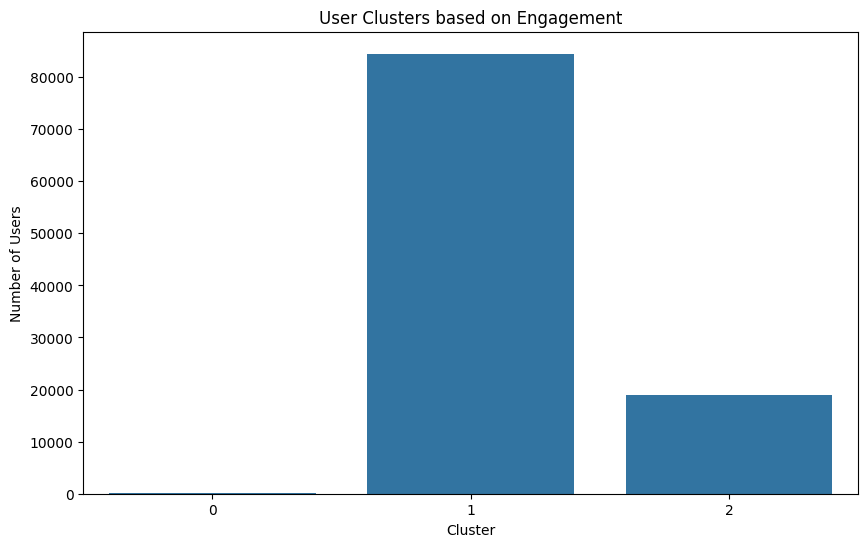

In [35]:
#Visualizing Cluster Results
# Visualization
plt.figure(figsize=(10,6))
sns.countplot(data=engagement_df, x='cluster')
plt.title('User Clusters based on Engagement')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

In [37]:
#Aggregate by Handset Type:
#You have the handset_type column, which could be used to understand traffic patterns for different devices.
# # Ensure you have calculated session_total_traffic first

data['session_total_traffic'] = data['total_ul_(bytes)'] + data['total_dl_(bytes)']

# Group by handset_type and calculate total traffic
traffic_per_handset = data.groupby('msisdn/number').agg(total_traffic=('session_total_traffic', 'sum')).reset_index()

# Get the top 10 handsets by total traffic
top_handsets = traffic_per_handset.nlargest(10, 'total_traffic')

# Display the top handsets
print(top_handsets)

       msisdn/number  total_traffic
24026   3.365043e+10   5.096129e+09
60489   3.366617e+10   4.771967e+09
1596    3.360658e+10   4.731467e+09
58054   3.366535e+10   4.600483e+09
29887   3.365836e+10   4.488854e+09
87417   3.369990e+10   4.478299e+09
58762   3.366555e+10   4.380360e+09
85769   3.369938e+10   4.267854e+09
96928   3.376357e+10   4.237338e+09
43729   3.366162e+10   4.213147e+09


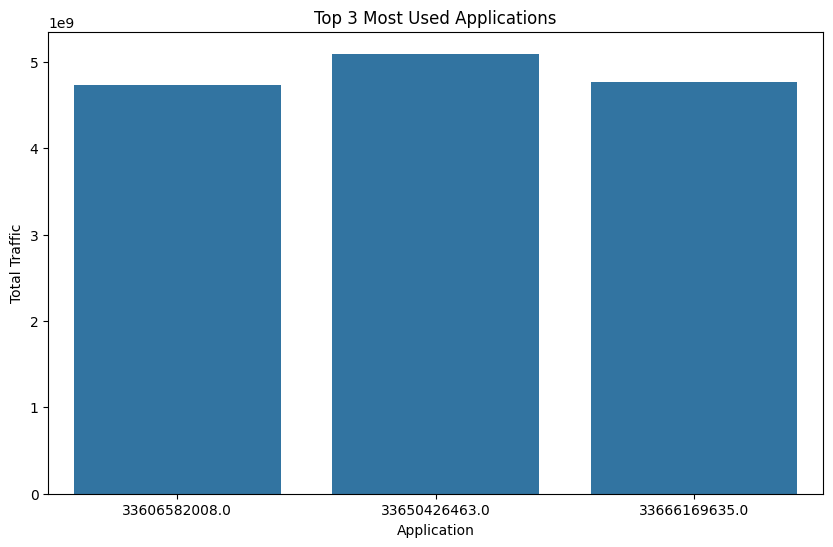

In [38]:
#Plot Top 3 Most Used Applications CopyReplit
plt.figure(figsize=(10,6))
sns.barplot(data=top_handsets.head(3), x='msisdn/number', y='total_traffic')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.show()

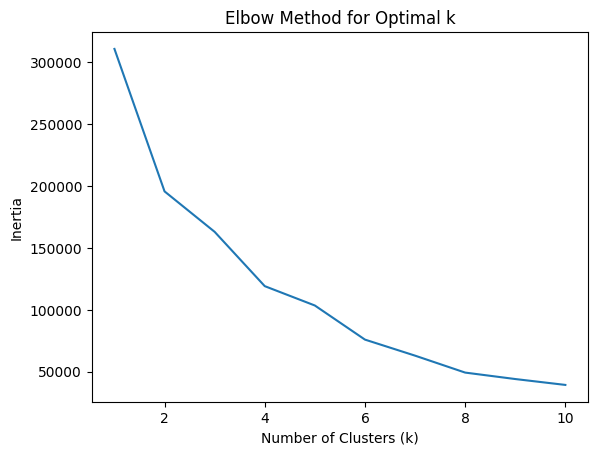

In [39]:
# Elbow method to determine optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(engagement_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [41]:
df=pd.read_csv("../Data/Data/telcom.csv")

In [42]:
#Task 3: Experience Analytics
#Aggregate Customer Information:


experience_metrics = df.groupby('msisdn/number').agg({
    'tcp_dl_retrans._vol_(bytes)': 'mean',  # Adjust according to actual column names
    'avg_rtt_dl_(ms)': 'mean',
    'handset_type': 'first',  # Assuming one type per user
    'avg_bearer_tp_dl_(kbps)': 'mean'
}).reset_index()

In [43]:
#Top, Bottom, and Most Frequent Values:


top_tcp = df['tcp_dl_retrans._vol_(bytes)'].nlargest(10)
bottom_tcp = df['tcp_dl_retrans._vol_(bytes)'].nsmallest(10)
frequent_tcp = df['tcp_dl_retrans._vol_(bytes)'].value_counts().nlargest(10)

print(top_tcp, bottom_tcp, frequent_tcp)

74265     4.294426e+09
128493    4.291380e+09
32628     4.289877e+09
133613    4.289488e+09
3646      4.288060e+09
114482    4.275259e+09
37600     4.268432e+09
73286     4.259997e+09
55469     4.256650e+09
39174     4.254644e+09
Name: tcp_dl_retrans._vol_(bytes), dtype: float64 56166     2.0
2723      4.0
37574     4.0
48938     4.0
56824     4.0
56875     4.0
136245    4.0
136523    4.0
18345     6.0
67558     6.0
Name: tcp_dl_retrans._vol_(bytes), dtype: float64 tcp_dl_retrans._vol_(bytes)
1330.0    422
2660.0    216
38.0      200
92.0      191
1318.0    152
543.0     128
3990.0    112
76.0      108
5320.0    101
1288.0     93
Name: count, dtype: int64


<Axes: xlabel='handset_type'>

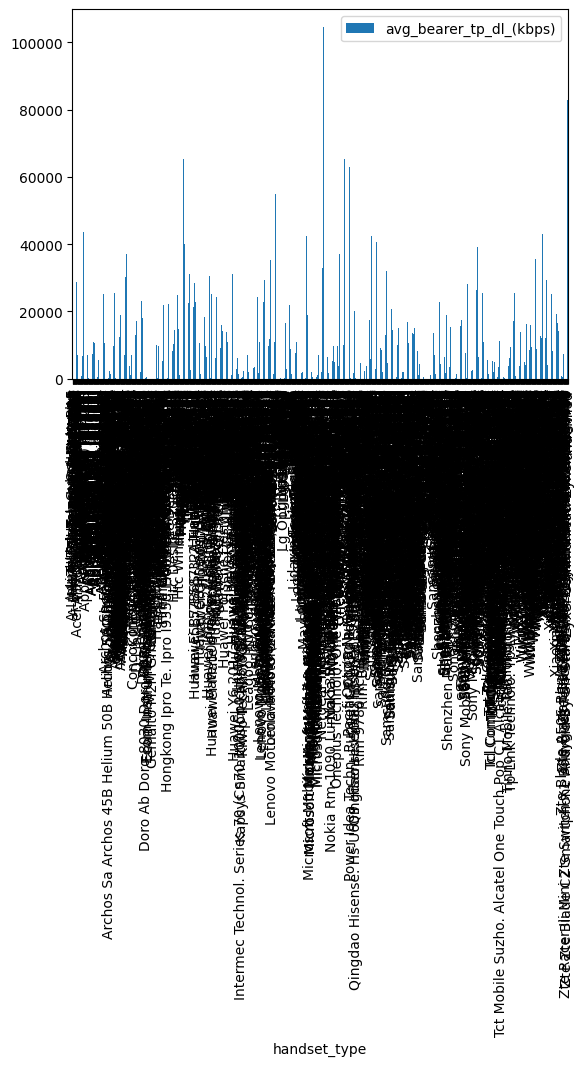

In [44]:
#Distribution Analysis:

experience_dist = df[['handset_type', 'avg_bearer_tp_dl_(kbps)']].groupby('handset_type').mean()
experience_dist.plot(kind='bar')

In [45]:
experience_metrics['tcp_dl_retrans._vol_(bytes)'].fillna(experience_metrics['tcp_dl_retrans._vol_(bytes)'].mean(), inplace=True)
experience_metrics['avg_rtt_dl_(ms)'].fillna(experience_metrics['avg_rtt_dl_(ms)'].mean(), inplace=True)
experience_metrics['avg_bearer_tp_dl_(kbps)'].fillna(experience_metrics['avg_bearer_tp_dl_(kbps)'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20236\1129762086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  experience_metrics['tcp_dl_retrans._vol_(bytes)'].fillna(experience_metrics['tcp_dl_retrans._vol_(bytes)'].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_20236\1129762086.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

In [46]:
#K-means Clustering of User Experiences:
from sklearn.preprocessing import StandardScaler  # or MinMaxScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
experience_normalized = scaler.fit_transform(experience_metrics[['tcp_dl_retrans._vol_(bytes)', 'avg_rtt_dl_(ms)', 'avg_bearer_tp_dl_(kbps)']])
experience_kmeans = KMeans(n_clusters=3)
experience_metrics['Experience_Cluster'] = experience_kmeans.fit_predict(experience_normalized)

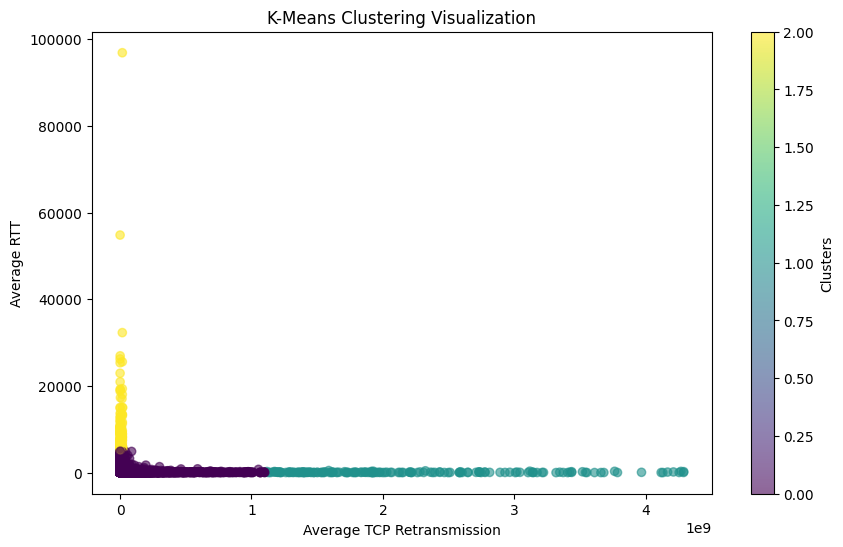

In [47]:
# Use two features for a 2D plot
plt.figure(figsize=(10, 6))
plt.scatter(experience_metrics['tcp_dl_retrans._vol_(bytes)'], experience_metrics['avg_rtt_dl_(ms)'], 
            c=experience_metrics['Experience_Cluster'], 
            cmap='viridis', 
            alpha=0.6)

# Adding titles and labels
plt.title('K-Means Clustering Visualization')
plt.xlabel('Average TCP Retransmission')
plt.ylabel('Average RTT')
plt.colorbar(label='Clusters')
plt.show()

In [48]:
#Task 4 - Satisfaction Analysis
#Here, we will compute engagement and experience scores before proceeding with K-Means again.

#Engagement and Experience Scores

# Engagement Score using Euclidean distance
engagement_cluster_centers = kmeans.cluster_centers_
experience_kmeans = KMeans(n_clusters=3)
experience_metrics['Experience_Cluster'] = experience_kmeans.fit_predict(experience_normalized)



def calculate_engagement_score(row):
    return np.linalg.norm(row[['sessions_frequency', 'session_duration', 'session_total_traffic']] - engagement_cluster_centers[1])  # Assuming cluster 1 is less engaged

engagement_df['engagement_score'] = engagement_df.apply(calculate_engagement_score, axis=1)

# Similarly for experience score
experience_cluster_centers = experience_kmeans.cluster_centers_

def calculate_experience_score(row):
    return np.linalg.norm(row[['tcp_dl_retrans._vol_(bytes)', 'avg_rtt_dl_(ms)', 'avg_bearer_tp_dl_(kbps)']] - experience_cluster_centers[1])  # Assuming cluster 1 is worst experience

experience_metrics['experience_score'] = experience_metrics.apply(calculate_experience_score, axis=1)

In [49]:
#Satisfaction Score Calculation

experience_metrics['satisfaction_score'] = (engagement_df['engagement_score'] + experience_metrics['experience_score']) / 2

# Top 10 satisfied customers
top_satisfied = experience_metrics.nlargest(10, 'satisfaction_score')

In [50]:
#Regression Model for Satisfaction Prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = [engagement_df['engagement_score'] , experience_metrics['experience_score']]
y = experience_metrics['satisfaction_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2, 103647]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Assuming engagement_df and experience_metrics are defined
# Combine the two features into a DataFrame
X = pd.DataFrame({
    'engagement_score': engagement_df['engagement_score'],
    'experience_score': experience_metrics['experience_score']
})

# Target variable
y = experience_metrics['satisfaction_score']

# Ensure all are of the same length
print(X.shape)  # Check the shape of X
print(y.shape)  # Check the shape of y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

(103647, 2)
(103647,)


LinearRegression()

X shape: (103647, 2)
y shape: (103647,)
Mean Squared Error: 0.000
R^2 Score: 1.000


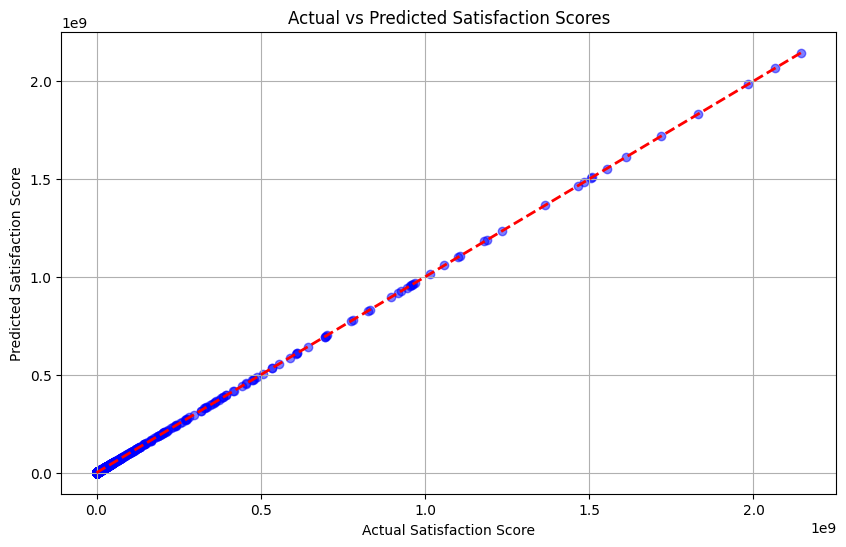


Report:
Mean Squared Error: 0.000
R^2 Score: 1.000


In [53]:
# Combining the features into a DataFrame
X = pd.DataFrame({
    'engagement_score': engagement_df['engagement_score'],
    'experience_score': experience_metrics['experience_score']
})

# Target variable
y = experience_metrics['satisfaction_score']

# Ensure all are of the same length
print(f"X shape: {X.shape}")  # Check the shape of X
print(f"y shape: {y.shape}")  # Check the shape of y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Reference line
plt.title('Actual vs Predicted Satisfaction Scores')
plt.xlabel('Actual Satisfaction Score')
plt.ylabel('Predicted Satisfaction Score')
plt.grid()
plt.show()

# Reporting results
report = {
    "Mean Squared Error": mse,
    "R^2 Score": r2,
}
print("\nReport:")
for key, value in report.items():
    print(f"{key}: {value:.3f}")